In [ ]:
#!pip install pytesseract


In [ ]:
#!apt-get install tesseract-ocr
#!apt-get install libtesseract-dev

In [ ]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'
from pdf2image import convert_from_path
import pdfplumber

In [ ]:
# Convert each page of the PDF to images
pdf_path = r'/content/sss.pdf'
pages = convert_from_path(pdf_path)

# Extract text from each page
for page in pages:
    # Convert the image to text
    extracted_text = pytesseract.image_to_string(page)
    print(extracted_text)
    

5/7/23, 6:20 PM Friday, 24th March, 2023 | National Assembly of Zambia

Home | Mail | NAZ-SACCO | Radio | Contact Us

 

o

Home About Parliament | Members | Committees | Publications |

Home

 

ese

 

Friday, 24th March, 2023

Public Financial Management Handbook
Debates and Proceedings

Gi

NATIONAL ASSEMBLY OF ZAMBIA
Friday, 24th March, 2023
SECOND SESSION OF THE THIRTEENTH ASSEMBLY
ORDER PAPER - FRIDAY, 24TH MARCH, 2023

AT 09:00 HOURS

QUESTION FOR ORAL ANSWER (STANDING ORDER 76)

223. Mr. Mtayachalo (Chama North) - to ask the Minister of Tourism:

(a) whether the Government is aware that elephants are terrorising people and destroying crops in the following villages in Chama
North Parliamentary Constituency:

(i) M’bangandwe;
(ii) Mungulube;
(iii) Chipeta;

(iv) Zoobole; and

(v) Mulumbu; and

(b) if so, what urgent measures are being taken to avert hunger and safeguard human life.

QUESTIONS FOR ORAL ANSWER (STANDING ORDER 74)

224. Mr. P Phiri (Mkaika) - to ask the Minister o

In [ ]:
import csv

# Extracted text (example)
# Path to the output CSV file
output_csv_file = r'/content/Order_paper.csv'

# Open the CSV file in write mode
with open(output_csv_file, 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)

    # Write the extracted text to the CSV file
    for line in extracted_text:
        writer.writerow([line])

#print(f"Extracted text has been saved to {output_csv_file}.")


In [ ]:
#!pip install tensorflow_text


In [ ]:
import pandas as pd 
import numpy as np 
import tensorflow as tf 
import tensorflow_hub as hub 
import tensorflow_text as text 

In [ ]:
#df=pd.read_csv(r'/content/Order_Paper_Paliament_1.csv', encoding='latin-1')
df=pd.read_csv(r'/content/Order_Paper_Paliament.csv', encoding='latin-1')

In [ ]:
df.head()

,Category,Questions_for_oral_answer
0,Negative,to ask the Minister of Tourism:\n\nwhether the...
1,Negative,"if so, what urgent measures are being taken to..."
2,Positive,why the construction of the National Registrat...
3,Negative,who the contractor for the project is;
4,Negative,"how much money was owed to the contractor, as ..."


In [ ]:
df.shape

(44, 2)

In [ ]:
#Check for Imbalanced dataset
df.groupby('Category').describe()


Questions_for_oral_answer         \
                             count unique   
Category                                    
Negative                        13     13   
Positive                        30     30   

                                                                  
                                                        top freq  
Category                                                          
Negative  to ask the Minister of Tourism:\n\nwhether the...    1  
Positive  why the construction of the National Registrat...    1

In [ ]:
df_positive = df[df['Category']=='Positive']
df_positive.shape

(30, 2)

In [ ]:

df_negative = df[df['Category']=='Negative']
df_negative.shape

(13, 2)

In [ ]:
data=pd.concat([df_positive, df_negative])
data.shape

(43, 2)

In [ ]:
data['Category'].value_counts()

Positive    30
Negative    13
Name: Category, dtype: int64

In [ ]:
#Data transformation using a lambada function
data['Results']=df['Category'].apply(lambda x: 1 if x=='Positive' else 0)
data.head()

,Category,Questions_for_oral_answer,Results
2,Positive,why the construction of the National Registrat...,1
5,Positive,when construction of the following infrastruct...,1
6,Positive,Mr. Chonde (Milenge) - to ask the Minister of ...,1
7,Positive,what the cause of the delay in completing the ...,1
8,Positive,Mr. C Chibuye (Mkushi North) - to ask the Min...,1


In [ ]:
import seaborn as sns 


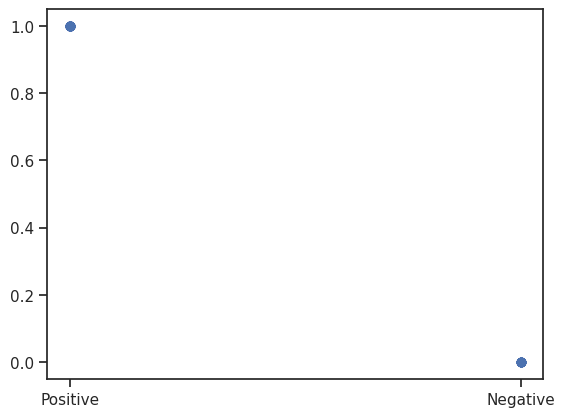

In [ ]:
import matplotlib.pyplot as plt 
plt.scatter(data.Category,data.Results)
plt.show()

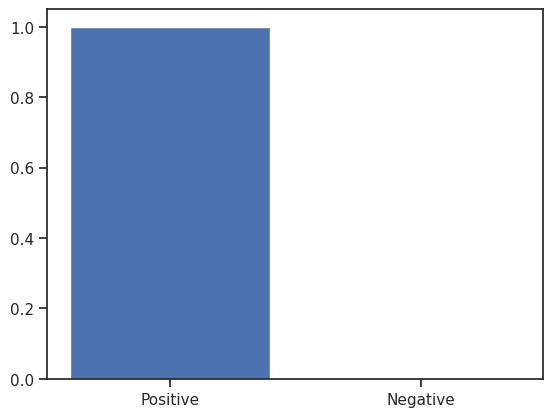

In [ ]:
import matplotlib.pyplot as plt 
plt.bar(data.Category,data.Results)
plt.show()

In [ ]:
#Split it into training and test data set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['Questions_for_oral_answer'],data['Results'], stratify=data['Results'])



In [ ]:
#We now try to print x_train to make sure that we are training the correct column
X_train.head()

37    if so, what measures the Government is taking ...
16     Mr. Mtayachalo (Chama North) - to ask the Min...
7     what the cause of the delay in completing the ...
40    Mr. Malambo (Magoye) - to ask the Minister of ...
13    Mr. Kabaso (Mwansabombwe) - to ask the Ministe...
Name: Questions_for_oral_answer, dtype: object

In [ ]:
#We now download BERT Pre_trained models from tensorflow hub
#Now lets import BERT model and get embeding vectors for few sample statements
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [ ]:
#Build Model
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [ ]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer_6 (KerasLayer)     {'input_word_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                    

In [ ]:
len(X_train)

32

In [ ]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [ ]:
#Train the model and i will just go with 10 epochs
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
1/1 [==============================] - 28s 28s/step - loss: 0.7195 - accuracy: 0.6562 - precision: 0.6774 - recall: 0.9545
Epoch 2/20
1/1 [==============================] - 16s 16s/step - loss: 0.6531 - accuracy: 0.6562 - precision: 0.6774 - recall: 0.9545
Epoch 3/20
1/1 [==============================] - 16s 16s/step - loss: 0.6922 - accuracy: 0.6562 - precision: 0.6774 - recall: 0.9545
Epoch 4/20
1/1 [==============================] - 16s 16s/step - loss: 0.6597 - accuracy: 0.6875 - precision: 0.7000 - recall: 0.9545
Epoch 5/20
1/1 [==============================] - 14s 14s/step - loss: 0.6922 - accuracy: 0.7188 - precision: 0.7097 - recall: 1.0000
Epoch 6/20
1/1 [==============================] - 15s 15s/step - loss: 0.6560 - accuracy: 0.6875 - precision: 0.6875 - recall: 1.0000
Epoch 7/20
1/1 [==============================] - 15s 15s/step - loss: 0.6525 - accuracy: 0.6875 - precision: 0.6875 - recall: 1.0000
Epoch 8/20
1/1 [==============================] - 16s 16s/step

In [ ]:
#Evaluating the model
model.evaluate(X_test, y_test)

1/1 [==============================] - 4s 4s/step - loss: 0.5780 - accuracy: 0.7273 - precision: 0.7273 - recall: 1.0000


[0.5779882669448853, 0.7272727489471436, 0.7272727489471436, 1.0]

In [ ]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

1/1 [==============================] - 6s 6s/step


In [ ]:
import numpy as np

y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)
cm 

array([[1, 2],
       [3, 5]])

Text(46.25, 0.5, 'Truth')

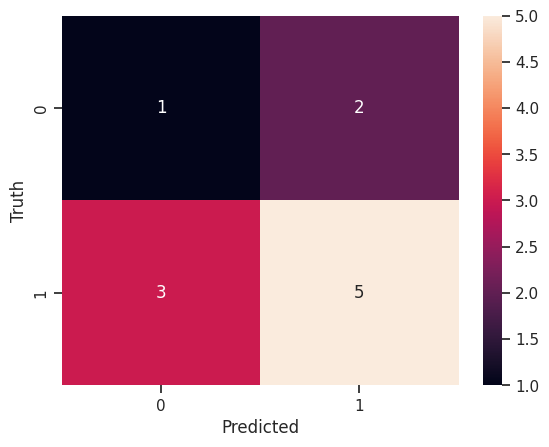

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.25      0.33      0.29         3
           1       0.71      0.62      0.67         8

    accuracy                           0.55        11
   macro avg       0.48      0.48      0.48        11
weighted avg       0.59      0.55      0.56        11

